In [60]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

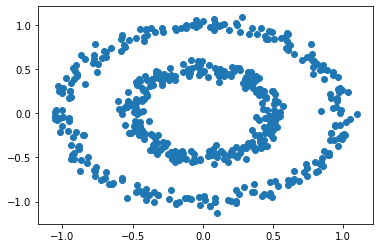

In [61]:
#Creación del dataset

n=500 #Número de registros que tenemos en nuestros datos
p=2 #Cuantas caracteristicas tiene cada uno de los registros de nuestros datos

X,Y =make_circles(n_samples=n,factor=0.5,noise=0.05)
    #X son las inputs y Y las outputs
    
Y=Y[:,np.newaxis]
    
plt.scatter(X[:,0],X[:,1])
plt.show()

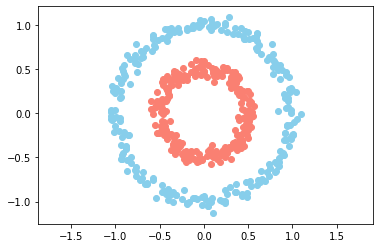

In [62]:
plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
plt.axis("equal")
plt.show()

In [63]:
#Clase de la capa de la red

class neural_layer():
    
    def __init__(self,n_conex,n_neur,act_func):
        
        self.act_func=act_func #Función de activación
        
        self.b = np.random.rand(1, n_neur)*2-1 #bias, va a ser un vector columna y recibe como parámetro el número de neuronas
                #Para que esté normalizada en cero, se multiplica por 2 y se le resta 1
        
        self.w = np.random.rand(n_conex, n_neur)*2-1 # Matriz de pesos
                #Por lo tanto debe tener el número de neuronas y el número de conexiones entre estas

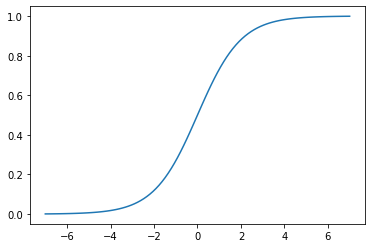

In [64]:
#Funciones de activación

sigm = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x*(1-x))

_x=np.linspace(-7,7,100)
plt.plot(_x,sigm[0](_x))
plt.show()

In [65]:
l0=neural_layer(p,4,sigm)
l1=neural_layer(4,8,sigm)

# ...

#Vamos a crear una función que se va a encargar de crear nuestra red neuronal

topology = [p,4,8,1]
    #Inidica el número de nueronas que va a tener cada capa
        #El número de neuronas va a ser el único hiperparametro que vamos a variar en este caso

def create_nn(topology,act_f):
    #Función que creará la red, tiene como parametros la topologia y la función de activación
    
    nn=[]
        #Vector que va a contener todas las capas de la red neuronal
    
    for l,layer in enumerate(topology[:-1]):
        
        nn.append(neural_layer(topology[l],topology[l+1],act_f))
    
    return nn
        
        

In [67]:
print(create_nn(topology,sigm)[0].b)
print(create_nn(topology,sigm)[0].w)

[[-0.47354397  0.27044904  0.2103771  -0.25353541]]
[[-0.33759916  0.00844435  0.78050437  0.1525988 ]
 [-0.49555653  0.4162036   0.17935931  0.89686423]]


In [59]:
topology = [p,4,8,1]
neural_net=create_nn(topology,sigm)

In [35]:
l2_cost= (lambda Yp, Yr:np.mean((Yp-Yr)**2),
         lambda Yp,Yr: (Yp-Yr)) #Derivada de la función
    #Función de coste
        #Error cuadrático medio

def train(neural_net,X,Y,l2_cost,lr=0.05,train=True):
    #Aquí ira todo el código que se encargará de entrenar nuestra red
    
    #Forward pass
        #Es coger el vector de entrada y pasarlo capa por capa
            #ES decir, suma ponderada con el bias y luego aplicarle la función de activación
            
    out=[(None,X)]
    
    for l,layer in enumerate(neural_net):
    
        z= out[-1][1] @ neural_net[l].w + neural_net[l].b
            #Esta es la suma ponderada
    
        a=neural_net[l].act_func[0](z)
            #Pasamos la suma ponderada a la función de activación
            
        out.append((z,a))
            #Va guardando los datos que se van generando en cada capa para luego ingresarlos a la siguiente
    
    print(l2_cost[0](out[-1][1],Y))
    
    if train:
        #backward pass
        deltas = []
        
        for l in reversed(range(0,len(neural_net))):
            
            z=out[l+1][0]
                #Suma ponderada
            a=out[l+1][1]
                #activación
            
            if l==len(neural_net) -1:
                #calcular delta de la última capa
                deltas.insert(0,l2_cost[1](a,Y)*neural_net[1].act_func[1](a))
            else:
                #Calcular delta respecto a capa previa
                deltas.insert(0,deltas[0] @ _w.T *neural_net[l].act_func[1](a))
        
            _w=neural_net[l].w
            
        #gradient descent
            #Hacer uso de las deltas calculadas en el back propagation para optimizar los parametros de la red
            
            neural_net[l].b = neural_net[l].b -np.mean(deltas[0], axis=0, keepdims=True)*lr
                #Descenso del gradiente para el parámetro de bias
            
            neural_net[l].w = neural_net[l].w -out[l][1].T @ deltas[0]*lr
    return out[-1][1]
    

train(neural_net,X,Y,l2_cost,0.5);

0.4999997484486378


<div style="text-align:center"><img src="backpropa.png" /></div>

In [36]:
#Una vez obtenido el valor del error se prosigue con ir hacia atras

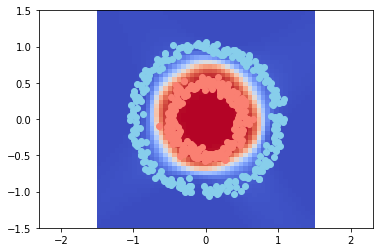

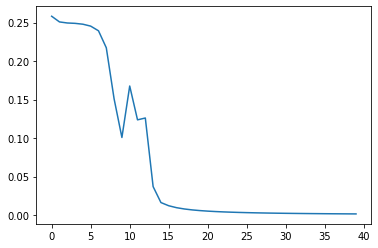

0.0014418129853777514
0.0014395452365574752
0.001437284316196639
0.0014350301940545117
0.0014327828400667111
0.0014305422243439132
0.0014283083171706124
0.00142608108900385
0.0014238605104719842
0.001421646552373457
0.001419439185675575
0.0014172383815132983
0.0014150441111880432
0.0014128563461664934
0.0014106750580794186
0.0014085002187205083
0.0014063318000452148
0.0014041697741695976
0.001402014113369194
0.0013998647900778784
0.001397721776886752
0.0013955850465430242
0.001393454571948918
0.001391330326160572


In [37]:
import time
from IPython.display import clear_output

neural_n=create_nn(topology,sigm)

loss=[]

for i in range(1000):
    
    #Entrenamos la red
    
    pY=train(neural_n,X,Y,l2_cost)
    
    if i % 25 == 0:
        
        loss.append(l2_cost[0](pY,Y))
        
        res = 50
        
        _x0 = np.linspace(-1.5,1.5,res)
        _x1 = np.linspace(-1.5,1.5,res)
        
        _Y=np.zeros((res,res))
        
        for i0,x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0,i1]=train(neural_n,np.array([[x0,x1]]),Y,l2_cost,train=False)[0][0]
                
        plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
        plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(0.5)